## Analyse du DataFrame

Maintenant que notre DataFrame est nettoyé nous allons pouvoir passer à l'analyse.
Le but de ce notebook est de faire une première analyse afin d’identifier les principaux leviers de performance, géographiques, temporels et produits avant de passer à une analyse plus appronfondie.

Import des packages nécessaires et modification du format de la date

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/online_retail_clean.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


## Indicateurs Clés

Nous allons d'abord identifier quelques informations primordiales.

Chiffre d'affaires total

In [50]:
total_revenue = df['TotalPrice'].sum()
print("Chiffre d'affaires Total: " + str(total_revenue))

Chiffre d'affaires Total: 17374804.268000003


Nombre de commandes

In [51]:
nb_orders = df['Invoice'].nunique()
print('Nombre de commandes: ' + str(nb_orders))

Nombre de commandes: 36969


Nombre de clients

In [ ]:
nb_customers = df['CustomerID'].nunique()
print('Nombre de clients: ' + str(nb_customers))

Nombre de commandes: 5878


Panier moyen

In [53]:
avg_basket = df.groupby('Invoice')['TotalPrice'].sum().mean()
print('Panier Moyen: ' + str(avg_basket))

Panier Moyen: 469.98307414320107


## Interprétation

Le chiffre d'affaire Total est de 7374804.268000003 avec un panier moyen de 469.9830741432011 pour 36969 commandes !

Au total on dénombre 5878 clients uniques

CA par pays

In [54]:
sales_by_country = (
    df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
)

sales_by_country.head(10)

Country
United Kingdom    1.438923e+07
EIRE              6.165705e+05
Netherlands       5.540381e+05
Germany           4.250197e+05
France            3.487690e+05
Australia         1.692835e+05
Spain             1.083325e+05
Switzerland       1.000619e+05
Sweden            9.151582e+04
Denmark           6.858069e+04
Name: TotalPrice, dtype: float64

## Première Visualisation simple du chiffre d'affaires par pays

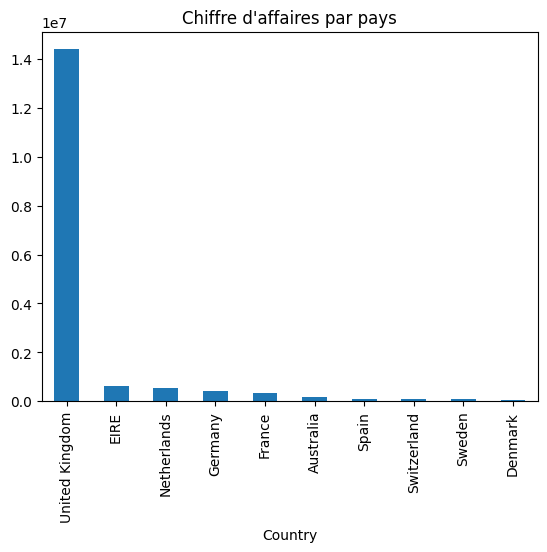

In [55]:
sales_by_country.head(10).plot(kind='bar')
plt.title("Chiffre d'affaires par pays")
plt.show()

On observe bien que le Royaume-Uni domine largement les ventes.

Ajout d'une nouvelle colonne 'Month'

In [56]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')

CA par mois

In [57]:
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
monthly_sales

Month
2009-12     683504.010
2010-01     555802.672
2010-02     504558.956
2010-03     696978.471
2010-04     591982.002
2010-05     597833.380
2010-06     636371.130
2010-07     589736.170
2010-08     602224.600
2010-09     829013.951
2010-10    1033112.010
2010-11    1166460.022
2010-12     570422.730
2011-01     568101.310
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     677355.150
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     517208.440
Freq: M, Name: TotalPrice, dtype: float64

Graphique pour une meilleure visualisation

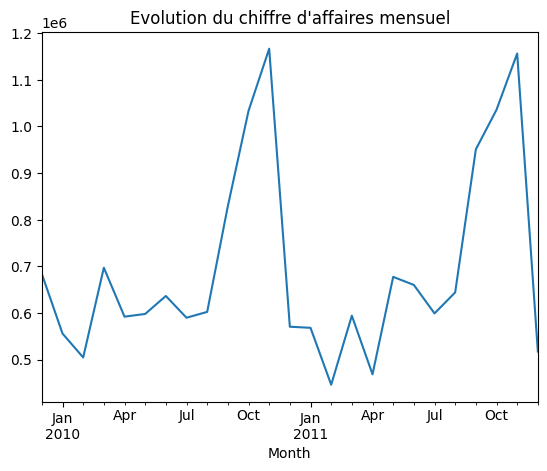

In [58]:
monthly_sales.plot()
plt.title("Evolution du chiffre d'affaires mensuel")
plt.show()

## Interprétation des chiffres

On voit que le CA connaît de fortes variation au cours de l'année.
On observe notamment un fort pic du CA lors de la 2e moitiée de l'année civile.

Top 10 des produits par CA

In [59]:
top_products = (
    df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
)

top_products

Description
REGENCY CAKESTAND 3 TIER              277656.25
WHITE HANGING HEART T-LIGHT HOLDER    247048.01
PAPER CRAFT , LITTLE BIRDIE           168469.60
Manual                                151777.67
JUMBO BAG RED RETROSPOT               134307.44
POSTAGE                               124648.04
ASSORTED COLOUR BIRD ORNAMENT         124351.86
PARTY BUNTING                         103283.38
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
PAPER CHAIN KIT 50'S CHRISTMAS         76598.18
Name: TotalPrice, dtype: float64

Le produit qui génère le plus de CA est le REGENCY CAKESTAND 3 TIER

## Conclusion de l'analyse

L'analyse montre que le chiffre d'affaires est fortement concentré sur un nombre limité de pays, avec une domination du Royaume-Uni.
Les ventes présentent également une évolution temporelle marquée, avec des pics sur certaines périodes.

Nous avons également déterminé les TOP produits.

Cette analyse permet d’identifier les principaux leviers de performance
géographiques, temporels et produits, et constitue une base pour une analyse
approfondie du comportement client.
